In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
twitter_data_file_path = "../Dados/Ukr_war_tweets.csv"

df_twitter = pd.read_csv(twitter_data_file_path, dtype = 'unicode')

display(df_twitter)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141897,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2,17,47,1,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9
1,2022-02-24 03:18:54+00:00,1496686044275695616,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2,104,188,8,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8
2,2022-02-24 03:22:42+00:00,1496687000375726080,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1,41,75,5,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8
3,2022-02-24 03:25:36+00:00,1496687731434565636,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21,407,1099,149,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9
4,2022-02-24 03:27:28+00:00,1496688201242759177,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7,152,207,22,1496493071495987201,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399851,2022-03-27 23:59:26+00:00,1508232258037112834,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1,0,6,0,1508232258037112834,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3
399852,2022-03-27 23:59:27+00:00,1508232263930105861,@tony07653102 @CNEWS Pour comprendre un confli...,philmarso,https://twitter.com/philmarso/status/150823226...,https://twitter.com/philmarso,NaN,NaN,0,0,1,0,1508135128706560000,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='CNEWS', id=18396319, displayna...",['#Ukraine'],1
399853,2022-03-27 23:59:34+00:00,1508232290413219841,"Putin ukrajinske vojnike naziva neonacizmom, a...",dicke5,https://twitter.com/dicke5/status/150823229041...,https://twitter.com/dicke5,NaN,NaN,0,0,0,0,1508232290413219841,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3
399854,2022-03-27 23:59:44+00:00,1508232332289126401,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0,0,0,0,1508232332289126401,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Ukraine,']",1


In [3]:
attrs = ['Datetime', 'Text', 'Language', 'hashtag']

df_twitter_texts = df_twitter[attrs]

df_twitter_texts.dropna(subset = ['Text'])

display(df_twitter_texts.head())

,Datetime,Text,Language,hashtag
0,2022-02-24 03:12:47+00:00,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine..."
1,2022-02-24 03:18:54+00:00,🇺🇦 Kharkiv is officially being struck by major...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."
2,2022-02-24 03:22:42+00:00,🇺🇦 More angles on that strike in Kharkiv. #Rus...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."
3,2022-02-24 03:25:36+00:00,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine..."
4,2022-02-24 03:27:28+00:00,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."


In [4]:
def get_words(string: str) -> list:
    pattern = r"\b[A-Za-z][A-Za-z]+"
        
    return re.findall(pattern, string.lower()) 
    
def count_words(df: pd.DataFrame) -> dict:
    word_freq = dict()
    
    for idx, row in df.iterrows():
        tweet_words = get_words(str(row['Text']))
        
        for word in tweet_words:
            if word in word_freq.keys():
                word_freq[word] += 1
            else:
                word_freq[word] = 1
                
    return word_freq

def get_hashtags(string: str) -> list:
    pattern = r"\#[A-Za-z]+"
    
    return re.findall(pattern, string)

def count_hashtags(df: pd.DataFrame) -> dict:
    word_freq = dict()
    
    for idx, row in df.iterrows():
        tweet_words = get_hashtags(str(row['Text']))
        
        for word in tweet_words:
            word = word.replace('#', '')
            
            if word in word_freq.keys():
                word_freq[word] += 1
            else:
                word_freq[word] = 1
                
    return word_freq

def get_filtered_words(word_frequency: dict, min_val: int = 1) -> dict:
    stop = set(stopwords.words('english'))
    languages = set(('russian', 'french', 'spanish', 'portuguese'))
    
    stop.add('nan')
        
    for language in languages:
        stop = stop.union(set(stopwords.words(language)))    
        
    words_list = set(filter(lambda x: ((word_frequency[x] >= min_val) & (x not in stop)), word_frequency.keys()))
    
    return {key: word_frequency[key] for key in words_list}

In [5]:
word_freq = count_words(df_twitter_texts)

print(len(word_freq))

95813


In [6]:
filtered_words = get_filtered_words(word_freq, 1000)

print((filtered_words))

{'mariupol': 1376, 'zelensky': 1281, 'ukrainerussianwar': 2222, 'ukraine': 27958, 'people': 2081, 'standwithukraine': 1659, 'one': 1042, 'russia': 11116, 'non': 1416, 'kyiv': 2035, 'und': 1505, 'world': 1667, 'ukraineunderatta': 1505, 'like': 1081, 'biden': 3806, 'di': 2464, 'ukrainerussiawar': 3320, 'russianukrainianwar': 1282, 'ukrainewar': 11671, 'der': 1786, 'trending': 46861, 'https': 34991, 'russiawar': 2279, 'che': 1619, 'amp': 2674, 'usa': 1144, 'ukrainerussiacrisis': 1294, 'president': 1096, 'russian': 6249, 'die': 2088, 'ukrainian': 2837, 'putin': 14906, 'us': 2030, 'russiaukrainewar': 1730, 'ukrainecrisis': 1972, 'nato': 2511, 'co': 35078, 'ukraineunderattack': 1629, 'stopwar': 3924, 'war': 5296, 'ukraineconflict': 10099, 'via': 1119, 'ukrainerussia': 2068}


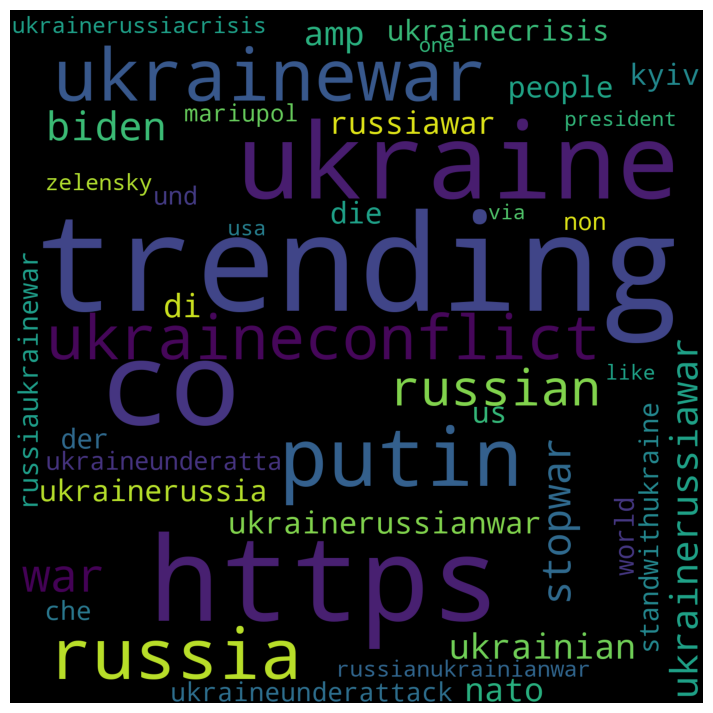

In [7]:
twitter_wordcloud = WordCloud(
                        width = 1500,
                        height = 1500,
                        background_color = "Black",
                        min_font_size = 10,
                        normalize_plurals = False
                    ).generate_from_frequencies(filtered_words)

plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(twitter_wordcloud)
plt.axis("off")
plt.show()

In [8]:
df_hashtags = df_twitter_texts.dropna(subset = ['hashtag'])

df_hashtags = df_hashtags.reset_index(drop = 1)

display(df_hashtags)

,Datetime,Text,Language,hashtag
0,2022-02-24 03:12:47+00:00,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine..."
1,2022-02-24 03:18:54+00:00,🇺🇦 Kharkiv is officially being struck by major...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."
2,2022-02-24 03:22:42+00:00,🇺🇦 More angles on that strike in Kharkiv. #Rus...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."
3,2022-02-24 03:25:36+00:00,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine..."
4,2022-02-24 03:27:28+00:00,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi..."
...,...,...,...,...
44061,2022-03-27 23:59:26+00:00,Russia’s mass media and telecommunications wat...,en,"['#RussiaUkraineWar', '#Russia', '#Ukraine']"
44062,2022-03-27 23:59:27+00:00,@tony07653102 @CNEWS Pour comprendre un confli...,fr,['#Ukraine']
44063,2022-03-27 23:59:34+00:00,"Putin ukrajinske vojnike naziva neonacizmom, a...",und,"['#Putin,', '#Ukrajina,', '#Zelenskij']"
44064,2022-03-27 23:59:44+00:00,"Watch: amid war ruins in #Ukraine, unbowed cla...",en,"['#Ukraine,']"


In [9]:
hashtag_freq = count_hashtags(df_hashtags)

print(len(hashtag_freq))

17950


In [10]:
filtered_hashtags = get_filtered_words(hashtag_freq, 500)

print(filtered_hashtags)

{'UkraineConflict': 9268, 'Ukraina': 697, 'ukraine': 2406, 'UkraineRussiaCrisis': 1279, 'USA': 638, 'russia': 922, 'NATO': 1378, 'UkraineRussia': 1939, 'Russia': 6724, 'RussiaUkraine': 568, 'RussiaWar': 1685, 'EU': 635, 'Ukrainian': 920, 'Putin': 9964, 'Biden': 2203, 'Zelensky': 722, 'RussiaUkraineConflict': 511, 'PutinWarCriminal': 590, 'Kyiv': 1508, 'UkraineUnderAttack': 1615, 'UkraineCrisis': 1781, 'Russian': 2416, 'UkraineUnderAtta': 1505, 'UkraineWar': 11014, 'RussianUkrainianWar': 1274, 'UkraineRussiaWar': 3262, 'StopRussia': 577, 'StopWar': 3249, 'UkraineRussianWar': 2212, 'putin': 1489, 'Ukraine': 18757, 'UkraineRussiaConflict': 843, 'US': 556, 'Mariupol': 742, 'StandWithUkraine': 1560, 'Ucraina': 657, 'UkraineInvasion': 637, 'stopwar': 544, 'war': 975, 'ukraineconflict': 568, 'StopPutin': 819, 'RussiaUkraineWar': 1609}


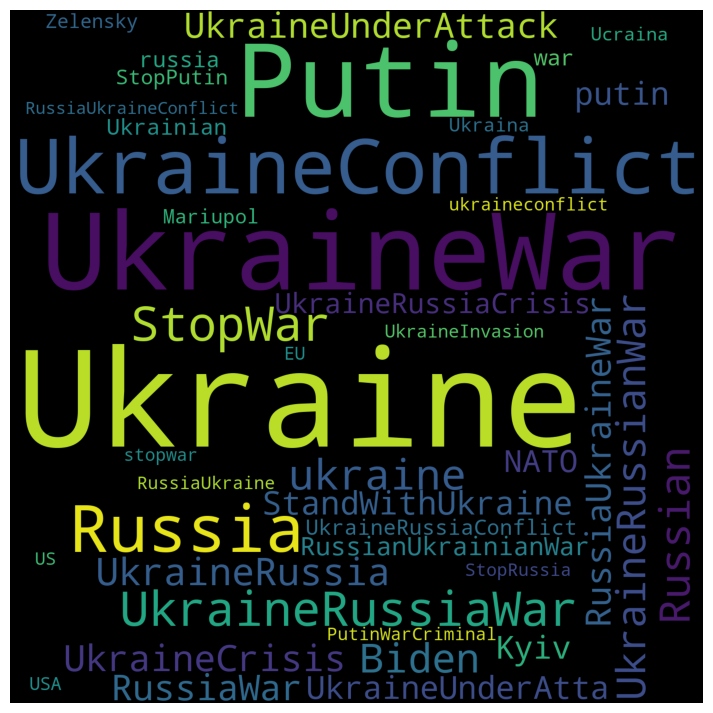

In [11]:
hashtag_wordcloud = WordCloud(
                        width = 1500,
                        height = 1500,
                        background_color = "Black",
                        min_font_size = 10,
                        normalize_plurals = False
                    ).generate_from_frequencies(filtered_hashtags)

plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(hashtag_wordcloud)
plt.axis("off")
plt.show()